# K-Means

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

**We define our function to compute distances between each points and each centroids. The distance is calculated using the Euclidian distance**
$$d(p, q) = \sqrt{\sum_{i=1}^{N} (p_i - q_i)²}$$

In [237]:
def compute_distances(x, centroids):
    distances = list()
    for centroid in centroids:
        distances.append(np.linalg.norm(x - centroid, axis=1))
    return np.array(distances)

**At each new classification, we have to calculate again our centroids**
$$\mu_k = \frac{1}{|C_k|}\sum_{x_j \in C_k}x_j$$


In [238]:
def compute_centroids(K, x, y_pred):
    centroids = list()
    for k in range(K):
        centroids.append(np.mean(x[y_pred == k], axis=0))
    return np.array(centroids)

In [239]:
def plot(x, y):
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [240]:
def confusion_matrix(pos_mask, neg_mask, y, y_pred):
    TP = sum(y[pos_mask] == y_pred[pos_mask])
    FN = sum(y[pos_mask] != y_pred[pos_mask])

    TN = sum(y[neg_mask] == y_pred[neg_mask])
    FP = sum(y[neg_mask] != y_pred[neg_mask])
    
    return TP, FN, TN, FP

def precision(TP, FP):
    return TP/(TP + FP)

def recall(TP, FN):
    return TP/(TP + FN)

def f1_score(precision, recall):
    return 2*(precision*recall)/(precision+recall)

In [241]:
def train(x, K, condition_threshold):
    centroids = np.array([[0, 1], [1, 0]])#x[np.random.choice(x.shape[0], K, replace=False), :]
    condition = True
    step = 0
    
    while condition:
        
        distances = compute_distances(x, centroids)
        y_pred = np.argmin(distances, axis=0)
        
        old_centroids = deepcopy(centroids)
        centroids = compute_centroids(K, x, y_pred)
        
        condition = np.mean(np.abs(old_centroids - centroids)) > condition_threshold
        
        if step % 3 == 0.0:
            plot(x, y_pred)
            
    plot(x, y_pred)
    return centroids

**Initialize Dataset**

In [242]:
covA = np.array([[5, 0], [0, 5]])
covB = np.array([[5, 0], [0, 10]])
meanA = np.random.rand(2)
meanB = np.random.rand(2) + 10

train_size = 10000

dsetA = np.random.multivariate_normal(mean=meanA, cov=covA, size=(train_size, 1)).reshape(train_size, 2)
dsetB = np.random.multivariate_normal(mean=meanB, cov=covB, size=(train_size, 1)).reshape(train_size, 2)
dsetA = np.hstack((dsetA, np.zeros((dsetA.shape[0], 1))))
dsetB = np.hstack((dsetB, np.ones((dsetA.shape[0], 1))))

xA, yA = dsetA[:, :2], dsetA[:, 2]
xB, yB = dsetB[:, :2], dsetB[:, 2]

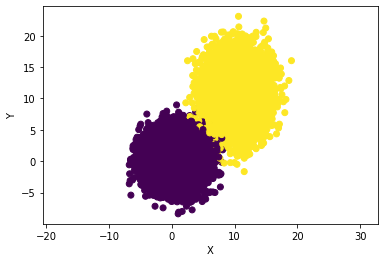

In [243]:
dset = np.concatenate((dsetA, dsetB), axis=0)
np.random.shuffle(dset)
x, y = dset[:, :2], dset[:, 2]

plot(x, y)

### TRAIN

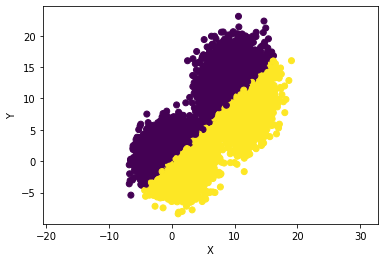

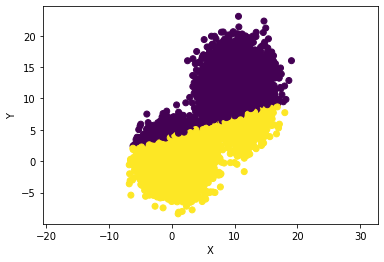

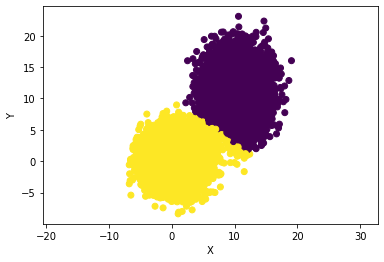

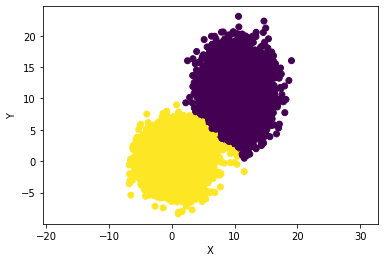

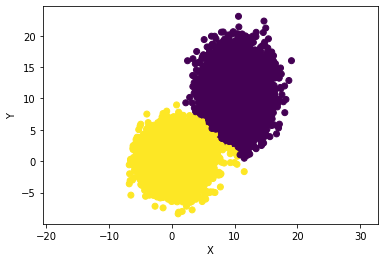

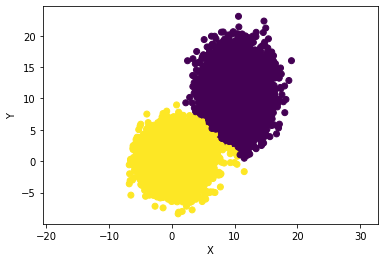

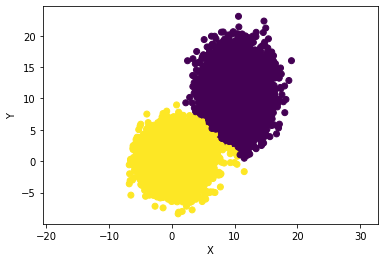

In [244]:
centroids = train(x, 2, 1e-5)

### TEST

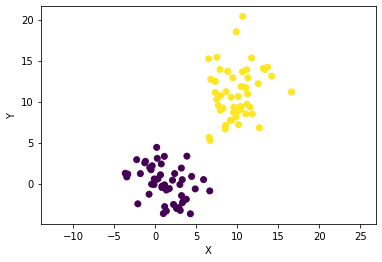

In [245]:
test_size = 50
dsetA_test = np.random.multivariate_normal(mean=meanA, cov=covA, size=(test_size, 1)).reshape(test_size, 2)
dsetB_test = np.random.multivariate_normal(mean=meanB, cov=covB, size=(test_size, 1)).reshape(test_size, 2)
dsetA_test = np.hstack((dsetA_test, np.zeros((dsetA_test.shape[0], 1))))
dsetB_test = np.hstack((dsetB_test, np.ones((dsetB_test.shape[0], 1))))

dset_test = np.concatenate((dsetA_test, dsetB_test), axis=0)
np.random.shuffle(dset_test)
x_test, y_test = dset_test[:, :2], dset_test[:, 2].astype(int)
plot(x_test, y_test)

In [248]:
distances = compute_distances(x_test, centroids)
y_pred_test = np.argmin(distances, axis=0)
pos_mask = y_test == 0
neg_mask = y_test == 1

In [255]:
TP, FN, TN, FP = confusion_matrix(pos_mask, neg_mask, 1 - y_test, y_pred_test)
p = precision(TP, FP)
r = recall(TP, FN)
print(f"precision: {p}")
print(f"recall: {r}")
print(f"f1 score: {f1_score(p, r)}")

precision: 1.0
recall: 1.0
f1 score: 1.0
